In [4]:
import cv2 
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10,10)
import os

In [ ]:
!sudo pip install --upgrade youtube_dl

In [ ]:
!pip install face_alignment

In [ ]:
!youtube-dl -F  https://www.youtube.com/watch?v=gp7oGkWKkig&ab_channel=iGadgetPro 
!youtube-dl -F  https://www.youtube.com/watch?v=bps3m4eFTuE&ab_channel=NBCNews 

In [ ]:
!mkdir data
!mkdir data/videos
!mkdir data/cropped_frames
!mkdir output

In [15]:
!youtube-dl -f 134 -o data/videos/elon.mp4 https://www.youtube.com/watch?v=gp7oGkWKkig&ab_channel=iGadgetPro 
!youtube-dl -f 134 -o data/videos/obama.mp4 https://www.youtube.com/watch?v=bps3m4eFTuE&ab_channel=NBCNews 

[youtube] gp7oGkWKkig: Downloading webpage
[download] Destination: data/videos/elon.mp4
[download] 100% of 6.67MiB in 00:00
[youtube] bps3m4eFTuE: Downloading webpage
[download] Destination: data/videos/obama.mp4
[download] 100% of 9.90MiB in 00:00


In [16]:
!rm -rf deepfakes
!git clone https://github.com/Mayukhdeb/deepfakes.git

Cloning into 'deepfakes'...
remote: Enumerating objects: 295, done.
remote: Counting objects: 100% (295/295), done.
remote: Compressing objects: 100% (205/205), done.
remote: Total 295 (delta 133), reused 226 (delta 77), pack-reused 0
Receiving objects: 100% (295/295), 1.85 MiB | 2.61 MiB/s, done.
Resolving deltas: 100% (133/133), done.


In [ ]:
!python deepfakes/generate_training_data.py

In [17]:
# from deepfakes.deepcake.crop_video_faces import trim_video
# from deepfakes.deepcake.crop_video_faces import crop_video_faces
# deepfakes.deepcake.crop_video_faces

In [ ]:
# !cp /content/drive/"My Drive"/deepfakes/models/model.pth /content/

In [ ]:
# s = 110
# e = 200
# trim_video("elon.mp4", start_time = s, end_time = e, target_path = "data/videos/elon_trimmed.mp4")
# trim_video("obama.mp4", start_time =s, end_time = e, target_path = "data/videos/obama_trimmed.mp4")
# crop_video_faces("data/videos/obama_trimmed.mp4", "data/cropped_frames/obama")
# paths = crop_video_faces("data/videos/elon_trimmed.mp4", "data/cropped_frames/elon")

In [22]:
!python deepfakes/train.py

tcmalloc: large alloc 3501195264 bytes == 0x1f4d0000 @  0x7f703eb871e7 0x7f6ff250c5e1 0x7f6ff2570c78 0x7f6ff2570d93 0x7f6ff2623fed 0x7f6ff262494e 0x7f6ff26272c8 0x7f6ff2767276 0x7f6ff2768d44 0x7f6ff276b492 0x7f6ff276c30e 0x5a48ec 0x5a4fb8 0x7f6ff262f7f7 0x59c9f0 0x50ea2d 0x507be4 0x508ec2 0x594a01 0x549e8f 0x5515c1 0x5a9dac 0x50a433 0x50cc96 0x507be4 0x509900 0x50a2fd 0x50cc96 0x507be4 0x50ad03 0x634e72
tcmalloc: large alloc 3971481600 bytes == 0x10d940000 @  0x7f703eb871e7 0x7f6ff250c5e1 0x7f6ff2570c78 0x7f6ff2570d93 0x7f6ff2623fed 0x7f6ff262494e 0x7f6ff26272c8 0x7f6ff2767276 0x7f6ff2768d44 0x7f6ff276b492 0x7f6ff276c30e 0x5a48ec 0x5a4fb8 0x7f6ff262f7f7 0x59c9f0 0x50ea2d 0x507be4 0x508ec2 0x594a01 0x549e8f 0x5515c1 0x5a9dac 0x50a433 0x50cc96 0x507be4 0x509900 0x50a2fd 0x50cc96 0x507be4 0x50ad03 0x634e72
deepcake trainer initiated on device: cuda
loading checkpoint:  model.pth
 78% 783/1000 [16:10<04:30,  1.24s/it]
ungracefully stopping...
lossA:0.04477717727422714, lossB:0.041005831211

In [ ]:
# times = [i for i in range(200, 1000, 30)]
# for l in range(len(times)-1):
#     s = times[l]
#     e = times[l+1]
#     print(s, e)
#     trim_video("elon.mp4", start_time = s, end_time = e, target_path = "data/videos/elon_trimmed.mp4")
#     trim_video("obama.mp4", start_time =s, end_time = e, target_path = "data/videos/obama_trimmed.mp4")
#     crop_video_faces("data/videos/obama_trimmed.mp4", "data/cropped_frames/obama")
#     crop_video_faces("data/videos/elon_trimmed.mp4", "data/cropped_frames/elon")
#     print("training...")
#     os.system("python deepfakes/train.py")

In [43]:
!python deepfakes/inference.py

<Figure size 700x300 with 1 Axes>


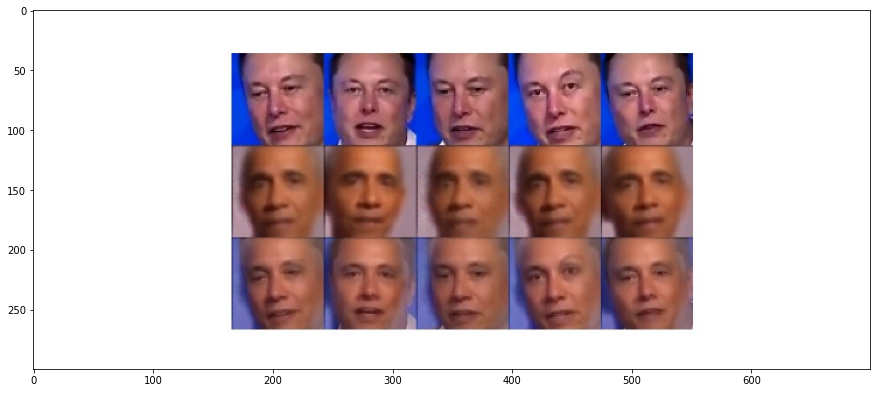

In [44]:
im = cv2.cvtColor(cv2.imread("output/preds.jpg"), cv2.COLOR_BGR2RGB)

plt.rcParams['figure.figsize'] = 15, 10
plt.imshow(im)
plt.show()

In [45]:
!cp model.pth /content/drive/"My Drive"/deepfakes/models